# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## Looking Around the World – What can Americans Learn?


## Preparing Data from the Organisation for Economic Co-operation and Development
We will be focusing on clean the data so that we can use clean data to perform our analysis.
We will be:
• Dropping irrelevant columns.
• Renaming certain values in the "year" column.
• Renaming columns so that they reflect what data is in them.

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
TOTAL_OECD_ARCHIVE_DATASET = '../data_file/raw_data_csv/OECD_total_archive.csv'
MEN_OECD_ARCHIVE_DATASET = '../data_file/raw_data_csv/OECD_men_archive.csv'
WOMEN_OECD_ARCHIVE_DATASET = '../data_file/raw_data_csv/OECD_women_archive.csv'

TOTAL_OECD_DATASET = '../data_file/raw_data_csv/OECD_1564_TUSupdatePortal_Total.csv'
MEN_OECD_DATASET = '../data_file/raw_data_csv/OECD_1564_TUSupdatePortal_Total_Men.csv'
WOMEN_OECD_DATASET = '../data_file/raw_data_csv/OECD_1564_TUSupdatePortal_Total_Women.csv'

In [3]:
# load csv_files into dataframes
total_oecd_archive_df = pd.read_csv(TOTAL_OECD_ARCHIVE_DATASET)
men_oecd_archive_df = pd.read_csv(MEN_OECD_ARCHIVE_DATASET)
women_oecd_archive_df = pd.read_csv(WOMEN_OECD_ARCHIVE_DATASET)

# load csv_files into dataframes
total_oecd_df = pd.read_csv(TOTAL_OECD_DATASET)
men_oecd_df = pd.read_csv(MEN_OECD_DATASET)
women_oecd_df = pd.read_csv(WOMEN_OECD_DATASET)

In [4]:
total_oecd_archive_df.head()

,MEN & WOMEN,Unnamed: 1,Australia,Austria,Belgium,Canada,Denmark,Estonia,Finland,France,...,Slovenia,Spain,Sweden,Turkey,United Kingdom,United States,Unnamed: 30,China,India,South Africa
0,NaN,NaN,2006,2008/09,2013,2015,2001,2009/10,2009/10,2009/10,...,2000/01,2009/10,2010,2014/15,2014/2015,2016.0,NaN,2008,1999,2010
1,1,Paid work or study,238,306,191,305,225,256,229,204,...,265,202,274,200,262,290.0,NaN,340,295,241
2,1.1,paid work (all jobs),186,248,127,238,177,201,177,145,...,202,151,246,154,194,232.0,NaN,268,240,153
3,1.2,travel to and from work/study,25,29,22,29,23,29,21,23,...,25,21,18,(see note),39,22.0,NaN,47,32,36
4,1.3,time in school or classes,16,26,41,21,16,24,29,24,...,21,18,10,46,14,21.0,NaN,25,12,26


In [5]:
total_oecd_df.head()

,Unnamed: 0,Country,Australia*,Austria,Belgium*,Canada,Denmark,Estonia*,Finland,France,...,USA,Unnamed: 32,China*,India,South Africa,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,Survey year,2006,2008/09,2013,2015,2001,2009/10,2009/10,2009/10,...,2019,NaN,2008,1998/99,2010,NaN,NaN,NaN,NaN,NaN
1,NaN,Age of reference,15 and more,15-64,15-64,15-64,15-64,15-64,15-64,15-64,...,15-64,NaN,15-74,15-64,15-64,NaN,NaN,NaN,NaN,NaN
2,1.0,Paid work or study,238,306,236,305,225,256,229,204,...,289,NaN,340,295,241,NaN,NaN,NaN,NaN,NaN
3,1.1,paid work (all jobs),186,248,168,238,177,201,177,145,...,233,NaN,268,240,153,NaN,NaN,NaN,NaN,NaN
4,1.2,travel to and from work/study,25,29,26,29,23,29,21,23,...,22,NaN,47,32,36,NaN,NaN,NaN,NaN,NaN


We found in our dataset that every single country with the exception of the US had 1440 minutes when summed. Since the USA was what we were focusing on, we needed another way of looking at US time use data. The solution we found was to take the American portion of time use from the archived version of the OECD dataset. This 2008 version of the America column was put into the new version of the OECD dataset for the men, women, and total figures respectively. This then created its own issue wherein we needed a way to not repeat the cleaning process for the same files effectively 6 times over. Since the archived and current versions of the oecd dataset are in different formats, it was decided that a few functions would have to be made to clean the data.

## Functions
split_year - splits the year from the date if there are 2 years and selects the first of the 2 years.
clean_oecd_current - cleans the current oecd dataset.
clean_oecd_archive - cleans the archived oecd dataset.
clean_oecd - deals with the parts of the cleaning process that the two datasets have in common.

In [6]:
# read the csv file
def split_year(df):

    df['Survey year'] = df['Survey year'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) else int(x))

    df = df.apply(lambda x: x.replace('..', 0))
    return df

In [7]:
def clean_oecd_current(df):
    df.columns = df.columns.str.replace('[*]', '')

    df = df.T.iloc[1:]
    # Drop extra columns and rows
    df = df.dropna(axis=1, how='all').dropna(axis=0, how='all')
    df = df.drop(columns=34)
    # Reconfigure columns and rows
    df.columns = df.iloc[0]
    df = df[1:]
    df = df.drop(['Age of reference'], axis = 1)

    return df

In [8]:
def clean_oecd_archive(df):

    df = df.T.iloc[1:]
    # Drop extra columns and rows
    df = df.dropna(axis=1, how='all').dropna(axis=0, how='all')

    df = df.T



    df.rename(columns = {'Unnamed: 1':'Country'}, inplace = True)
    df.rename(columns = {'OECD Activity categories': 'Country'}, inplace = True)
    df['Country'][0] = df['Country'][0] = 'Survey year'
    df = df.T
    df = df.drop(columns=32)
    df = df.drop(columns=33)
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header

    return df


In [9]:
def clean_oecd(df, archive_version=False):
    # df = pd.read_csv(f)

    # TODO If a column comes with an astrisk, depending on which column, the data might be uncomfortable to use. Will investigate.
    if archive_version:
        df = clean_oecd_archive(df)
    else:
        df = clean_oecd_current(df)

    split_year(df)
    df.loc[:, 'Paid work or study':] = df.apply(pd.to_numeric, downcast="integer", errors='coerce')
    df.fillna(0, inplace=True)

    return df

In [10]:
#clean archive OECD dataframes 
total_oecd_archive_df = clean_oecd(total_oecd_archive_df, True)
men_oecd_archive_df = clean_oecd(men_oecd_archive_df, True) 
women_oecd_archive_df =  clean_oecd(women_oecd_archive_df, True)

In [11]:
total_oecd_df

,Unnamed: 0,Country,Australia*,Austria,Belgium*,Canada,Denmark,Estonia*,Finland,France,...,USA,Unnamed: 32,China*,India,South Africa,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,Survey year,2006,2008/09,2013,2015,2001,2009/10,2009/10,2009/10,...,2019,NaN,2008,1998/99,2010,NaN,NaN,NaN,NaN,NaN
1,NaN,Age of reference,15 and more,15-64,15-64,15-64,15-64,15-64,15-64,15-64,...,15-64,NaN,15-74,15-64,15-64,NaN,NaN,NaN,NaN,NaN
2,1.0,Paid work or study,238,306,236,305,225,256,229,204,...,289,NaN,340,295,241,NaN,NaN,NaN,NaN,NaN
3,1.1,paid work (all jobs),186,248,168,238,177,201,177,145,...,233,NaN,268,240,153,NaN,NaN,NaN,NaN,NaN
4,1.2,travel to and from work/study,25,29,26,29,23,29,21,23,...,22,NaN,47,32,36,NaN,NaN,NaN,NaN,NaN
5,1.3,time in school or classes,16,26,27,21,16,24,29,24,...,18,NaN,25,12,26,NaN,NaN,NaN,NaN,NaN
6,1.4,research/homework,11,1,15,15,9,1,..,10,...,14,NaN,..,11,13,NaN,NaN,NaN,NaN,NaN
7,1.5,job search,..,1,..,2,..,..,..,2,...,2,NaN,..,..,..,NaN,NaN,NaN,NaN,NaN
8,1.6,other paid work or study-related,..,1,..,..,..,..,2,0,...,..,NaN,..,..,13,NaN,NaN,NaN,NaN,NaN
9,2.0,Unpaid work,243,202,192,186,217,208,197,181,...,219,NaN,164,191,182,NaN,NaN,NaN,NaN,NaN


In [12]:
#clean OECD dataframes 
total_oecd_df = clean_oecd(total_oecd_df)
men_oecd_df = clean_oecd(men_oecd_df)
women_oecd_df = clean_oecd(women_oecd_df)

<ipython-input-7-c5a0c154a675>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[*]', '')


In [13]:
total_oecd_df

Country,Survey year,Paid work or study,paid work (all jobs),travel to and from work/study,time in school or classes,research/homework,job search,other paid work or study-related,Unpaid work,routine housework,...,Leisure,sports,participating / attending events,visiting or entertaining friends,TV or radio at home,Other leisure activities,Other,religious / spiritual activities and civic obligations,other (no categories),Total
Australia,2006,238,186,25,16,11.0,0.0,0.0,243,132,...,281,19,6.0,40,140,76,20,13.0,7.0,1440
Austria,2008,306,248,29,26,1.0,1.0,1.0,202,125,...,291,32,9.0,82,109,59,8,3.0,5.0,1440
Belgium,2013,236,168,26,27,15.0,0.0,0.0,192,121,...,339,21,15.0,50,131,122,9,3.0,7.0,1440
Canada,2015,305,238,29,21,15.0,2.0,0.0,186,115,...,279,21,6.0,53,109,89,34,4.0,30.0,1440
Denmark,2001,225,177,23,16,9.0,0.0,0.0,217,128,...,329,22,7.0,81,123,95,10,6.0,4.0,1440
Estonia,2009,256,201,29,24,1.0,0.0,0.0,208,121,...,309,27,8.0,38,122,114,5,1.0,4.0,1440
Finland,2009,229,177,21,29,0.0,0.0,2.0,197,109,...,331,37,8.0,55,118,113,43,1.0,41.0,1440
France,2009,204,145,23,24,10.0,2.0,0.0,181,129,...,294,12,15.0,55,114,98,9,3.0,6.0,1440
Germany,2012,248,191,28,14,10.0,1.0,4.0,196,109,...,331,26,14.0,61,118,112,17,3.0,14.0,1440
Greece,2013,228,163,25,23,17.0,0.0,0.0,180,125,...,341,28,5.0,56,137,115,6,3.0,3.0,1440


In [14]:
total_oecd_archive_df.columns

Index(['Survey year', 'Paid work or study', 'paid work (all jobs)',
       'travel to and from work/study', 'time in school or classes',
       'research/homework', 'job search', 'other paid work or study-related',
       'Unpaid work', 'routine housework', 'shopping',
       'care for household members', 'child care', 'adult care',
       'care for non household members', 'volunteering',
       'travel related to household activities', 'other unpaid',
       'Personal care', 'sleeping', 'eating & drinking',
       'personal, household, and medical services + travel related to personal care',
       'Leisure', 'sports', 'participating / attending events',
       'visiting or entertaining friends', 'TV or radio at home',
       'Other leisure activities', 'Other',
       'religious / spiritual activities and civic obligations',
       'other (no categories)', 'Total'],
      dtype='object', name='Country')

 To simplify our graphs in later notebooks, the names of the dataset columns are revised

In [15]:
def rename_oecd_columns(df):
    df.rename(columns = {'Survey year':'year',
                         'Age of reference':'age',
                         'Paid work or study':'paid_work_study',
                         'paid work (all jobs)':'paid_work_(all)',
                         'travel to and from work/study':'work_school_travel',
                         'time in school or classes':'in_school',
                         'job search':'job_serach',
                         'other paid work or study-related':'other_paid_work_study',
                         'Unpaid work':'unpaid_work',
                         'routine housework':'routine_housework',
                         'care for household members':'care_for_household_members',
                         'child care':'child_care',
                         'adult care':'adult_care',
                         'care for non household members':'care_for_non_household_members',
                         'travel related to household activities':'household_activity_travel',
                         'other unpaid':'other_unpaid',
                         'Personal care':'personal_care',
                         'eating & drinking':'eating_drinking',
                         'personal, household, and medical services + travel related to personal care':'personal_care_travel',
                         'Leisure':'leisure',
                         'participating / attending events':'attending_events',
                         'visiting or entertaining friends':'meeting_friends',
                         'TV or radio at home':'tv_radio',
                         'Other leisure activities':'other_leisure_activities',
                         'Other':'other',
                         'religious / spiritual activities and civic obligations':'religion',
                         'other (no categories)':'other_(no categories)',
                         'Total':'total'}, inplace = True)

rename_oecd_columns(total_oecd_archive_df)
rename_oecd_columns(men_oecd_archive_df)
rename_oecd_columns(women_oecd_archive_df)
rename_oecd_columns(total_oecd_df)
rename_oecd_columns(men_oecd_df)
rename_oecd_columns(women_oecd_df)

In [16]:
total_oecd_archive_df.head()

Country,year,paid_work_study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,unpaid_work,routine_housework,...,leisure,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,other,religion,other_(no categories),total
Australia,2006,238,186,25.0,16,11.0,0.0,0.0,243,132,...,281,19,6.0,10,140,106,20,13.0,7.0,1440
Austria,2008,306,248,29.0,26,1.0,1.0,1.0,202,125,...,291,32,9.0,82,109,59,8,3.0,5.0,1440
Belgium,2013,191,127,22.0,41,0.0,1.0,0.0,211,129,...,369,10,7.0,80,143,129,5,0.0,5.0,1440
Canada,2015,305,238,29.0,21,15.0,2.0,0.0,186,115,...,279,21,6.0,53,109,89,34,4.0,30.0,1440
Denmark,2001,225,177,23.0,16,9.0,0.0,0.0,217,128,...,329,22,7.0,81,123,95,10,6.0,4.0,1440


In [17]:
total_oecd_df.head()

Country,year,paid_work_study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,unpaid_work,routine_housework,...,leisure,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,other,religion,other_(no categories),total
Australia,2006,238,186,25,16,11.0,0.0,0.0,243,132,...,281,19,6.0,40,140,76,20,13.0,7.0,1440
Austria,2008,306,248,29,26,1.0,1.0,1.0,202,125,...,291,32,9.0,82,109,59,8,3.0,5.0,1440
Belgium,2013,236,168,26,27,15.0,0.0,0.0,192,121,...,339,21,15.0,50,131,122,9,3.0,7.0,1440
Canada,2015,305,238,29,21,15.0,2.0,0.0,186,115,...,279,21,6.0,53,109,89,34,4.0,30.0,1440
Denmark,2001,225,177,23,16,9.0,0.0,0.0,217,128,...,329,22,7.0,81,123,95,10,6.0,4.0,1440


In [18]:
print('Total: \n')
print(total_oecd_df.isnull().sum())
print(total_oecd_df.dtypes)

Total: 

Country
year                              0
paid_work_study                   0
paid_work_(all)                   0
work_school_travel                0
in_school                         0
research/homework                 0
job_serach                        0
other_paid_work_study             0
unpaid_work                       0
routine_housework                 0
shopping                          0
care_for_household_members        0
child_care                        0
adult_care                        0
care_for_non_household_members    0
volunteering                      0
household_activity_travel         0
other_unpaid                      0
personal_care                     0
sleeping                          0
eating_drinking                   0
personal_care_travel              0
leisure                           0
sports                            0
attending_events                  0
meeting_friends                   0
tv_radio                          0
other_leisu

In [19]:
def rename_oecd_columns(df):
    df.rename(columns = {'Survey year':'year',
                         'Age of reference':'age',
                         'Paid work or study':'paid_work_study',
                         'paid work (all jobs)':'paid_work_(all)',
                         'travel to and from work/study':'work_school_travel',
                         'time in school or classes':'in_school',
                         'job search':'job_serach',
                         'other paid work or study-related':'other_paid_work_study',
                         'Unpaid work':'unpaid_work',
                         'routine housework':'routine_housework',
                         'care for household members':'care_for_household_members',
                         'child care':'child_care',
                         'adult care':'adult_care',
                         'care for non household members':'care_for_non_household_members',
                         'travel related to household activities':'household_activity_travel',
                         'other unpaid':'other_unpaid',
                         'Personal care':'personal_care',
                         'eating & drinking':'eating_drinking',
                         'personal, household, and medical services + travel related to personal care':'personal_care_travel',
                         'Leisure':'leisure',
                         'participating / attending events':'attending_events',
                         'visiting or entertaining friends':'meeting_friends',
                         'TV or radio at home':'tv_radio',
                         'Other leisure activities':'other_leisure_activities',
                         'Other':'other',
                         'religious / spiritual activities and civic obligations':'religion',
                         'other (no categories)':'other_(no categories)',
                         'Total':'total'}, inplace = True)

rename_oecd_columns(total_oecd_df)
rename_oecd_columns(men_oecd_df)
rename_oecd_columns(women_oecd_df)
rename_oecd_columns(total_oecd_archive_df)
rename_oecd_columns(men_oecd_archive_df)
rename_oecd_columns(women_oecd_archive_df)

In [20]:
# total_oecd[29] = total_archive_oecd[27]

In [21]:
total_oecd_archive_df=total_oecd_archive_df.T
total_oecd_archive_df

,Australia,Austria,Belgium,Canada,Denmark,Estonia,Finland,France,Germany,Greece*,...,Portugal,Slovenia,Spain,Sweden,Turkey,United Kingdom,United States,China,India,South Africa
Country,,,,,,,,,,,,,,,,,,,,,
year,2006.0,2008.0,2013.0,2015.0,2001.0,2009.0,2009.0,2009.0,2012.0,2013.0,...,1999.0,2000.0,2009.0,2010.0,2014.0,2014.0,2016.0,2008.0,1999.0,2010.0
paid_work_study,238.0,306.0,191.0,305.0,225.0,256.0,229.0,204.0,248.0,182.0,...,295.0,265.0,202.0,274.0,200.0,262.0,290.0,340.0,295.0,241.0
paid_work_(all),186.0,248.0,127.0,238.0,177.0,201.0,177.0,145.0,191.0,120.0,...,234.0,202.0,151.0,246.0,154.0,194.0,232.0,268.0,240.0,153.0
work_school_travel,25.0,29.0,22.0,29.0,23.0,29.0,21.0,23.0,28.0,18.0,...,25.0,25.0,21.0,18.0,0.0,39.0,22.0,47.0,32.0,36.0
in_school,16.0,26.0,41.0,21.0,16.0,24.0,29.0,24.0,14.0,25.0,...,27.0,21.0,18.0,10.0,46.0,14.0,21.0,25.0,12.0,26.0
research/homework,11.0,1.0,0.0,15.0,9.0,1.0,0.0,10.0,10.0,17.0,...,9.0,17.0,8.0,0.0,0.0,13.0,13.0,0.0,11.0,13.0
job_serach,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
other_paid_work_study,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0
unpaid_work,243.0,202.0,211.0,186.0,217.0,208.0,197.0,181.0,196.0,193.0,...,223.0,231.0,217.0,196.0,199.0,195.0,197.0,164.0,191.0,182.0


In [22]:
total_oecd_df=total_oecd_df.T
total_oecd_df

,Australia,Austria,Belgium,Canada,Denmark,Estonia,Finland,France,Germany,Greece,...,Portugal,Slovenia,Spain,Sweden,Turkey,UK,USA,China,India,South Africa
Country,,,,,,,,,,,,,,,,,,,,,
year,2006.0,2008.0,2013.0,2015.0,2001.0,2009.0,2009.0,2009.0,2012.0,2013.0,...,1999.0,2000.0,2009.0,2010.0,2014.0,2014.0,2019.0,2008.0,1998.0,2010.0
paid_work_study,238.0,306.0,236.0,305.0,225.0,256.0,229.0,204.0,248.0,228.0,...,295.0,265.0,202.0,293.0,246.0,262.0,289.0,340.0,295.0,241.0
paid_work_(all),186.0,248.0,168.0,238.0,177.0,201.0,177.0,145.0,191.0,163.0,...,234.0,202.0,151.0,231.0,186.0,194.0,233.0,268.0,240.0,153.0
work_school_travel,25.0,29.0,26.0,29.0,23.0,29.0,21.0,23.0,28.0,25.0,...,25.0,25.0,21.0,31.0,31.0,39.0,22.0,47.0,32.0,36.0
in_school,16.0,26.0,27.0,21.0,16.0,24.0,29.0,24.0,14.0,23.0,...,27.0,21.0,18.0,31.0,17.0,14.0,18.0,25.0,12.0,26.0
research/homework,11.0,1.0,15.0,15.0,9.0,1.0,0.0,10.0,10.0,17.0,...,9.0,17.0,8.0,0.0,12.0,13.0,14.0,0.0,11.0,13.0
job_serach,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
other_paid_work_study,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0
unpaid_work,243.0,202.0,192.0,186.0,217.0,208.0,197.0,181.0,196.0,180.0,...,223.0,231.0,217.0,196.0,186.0,195.0,219.0,164.0,191.0,182.0


In [23]:
total_oecd_df['USA'] = total_oecd_archive_df['United States']
total_oecd_df = total_oecd_df.T
total_oecd_df

Country,year,paid_work_study,paid_work_(all),work_school_travel,in_school,research/homework,job_serach,other_paid_work_study,unpaid_work,routine_housework,...,leisure,sports,attending_events,meeting_friends,tv_radio,other_leisure_activities,other,religion,other_(no categories),total
Australia,2006.0,238.0,186.0,25.0,16.0,11.0,0.0,0.0,243.0,132.0,...,281.0,19.0,6.0,40.0,140.0,76.0,20.0,13.0,7.0,1440.0
Austria,2008.0,306.0,248.0,29.0,26.0,1.0,1.0,1.0,202.0,125.0,...,291.0,32.0,9.0,82.0,109.0,59.0,8.0,3.0,5.0,1440.0
Belgium,2013.0,236.0,168.0,26.0,27.0,15.0,0.0,0.0,192.0,121.0,...,339.0,21.0,15.0,50.0,131.0,122.0,9.0,3.0,7.0,1440.0
Canada,2015.0,305.0,238.0,29.0,21.0,15.0,2.0,0.0,186.0,115.0,...,279.0,21.0,6.0,53.0,109.0,89.0,34.0,4.0,30.0,1440.0
Denmark,2001.0,225.0,177.0,23.0,16.0,9.0,0.0,0.0,217.0,128.0,...,329.0,22.0,7.0,81.0,123.0,95.0,10.0,6.0,4.0,1440.0
Estonia,2009.0,256.0,201.0,29.0,24.0,1.0,0.0,0.0,208.0,121.0,...,309.0,27.0,8.0,38.0,122.0,114.0,5.0,1.0,4.0,1440.0
Finland,2009.0,229.0,177.0,21.0,29.0,0.0,0.0,2.0,197.0,109.0,...,331.0,37.0,8.0,55.0,118.0,113.0,43.0,1.0,41.0,1440.0
France,2009.0,204.0,145.0,23.0,24.0,10.0,2.0,0.0,181.0,129.0,...,294.0,12.0,15.0,55.0,114.0,98.0,9.0,3.0,6.0,1440.0
Germany,2012.0,248.0,191.0,28.0,14.0,10.0,1.0,4.0,196.0,109.0,...,331.0,26.0,14.0,61.0,118.0,112.0,17.0,3.0,14.0,1440.0
Greece,2013.0,228.0,163.0,25.0,23.0,17.0,0.0,0.0,180.0,125.0,...,341.0,28.0,5.0,56.0,137.0,115.0,6.0,3.0,3.0,1440.0


<AxesSubplot:xlabel='Paid Work Time (minutes)', ylabel='Number of Countries'>

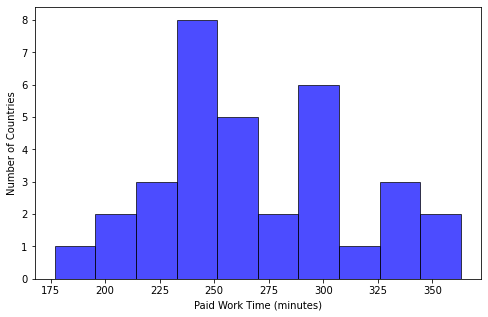

In [24]:
# Applies types to the rest of the columns in the dataframe
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel('Paid Work Time (minutes)')
ax.set_ylabel('Number of Countries')
total_oecd_df['paid_work_study'].hist(ax=ax, bins=10, grid=False,facecolor='blue', edgecolor='black', alpha=0.7)

<AxesSubplot:xlabel='Personal Care Time (minutes)', ylabel='Number of Countries'>

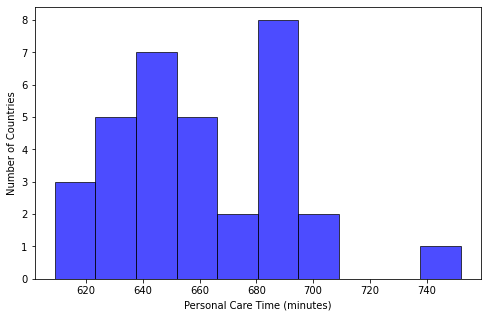

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel('Personal Care Time (minutes)')
ax.set_ylabel('Number of Countries')
total_oecd_df['personal_care'].hist(ax=ax, bins=10, grid=False,facecolor='blue', edgecolor='black', alpha=0.7)


<AxesSubplot:xlabel='Leisure Time (minutes)', ylabel='Number of Countries'>

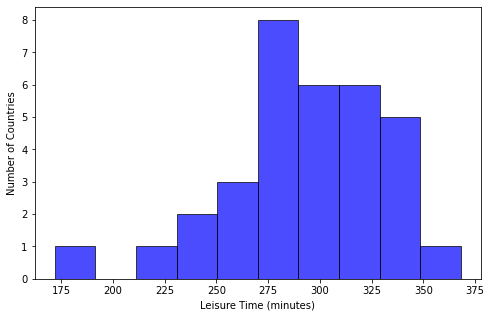

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_xlabel('Leisure Time (minutes)')
ax.set_ylabel('Number of Countries')

total_oecd_df['leisure'].hist(ax=ax, bins=10, grid=False,facecolor='blue', edgecolor='black', alpha=0.7)


In [27]:
sleeping_time_series_mean = total_oecd_df.groupby(['year'])['sleeping'].mean()
# sleeping_time_series_count = oecd_total.groupby(['Survey year']).mean()
# sleeping_time_series_count
sleeping_time_series_mean

year
1998.0    528.00
1999.0    506.00
2000.0    501.00
2001.0    489.00
2003.0    507.50
2005.0    491.00
2006.0    512.00
2008.0    520.00
2009.0    518.60
2010.0    508.50
2012.0    498.00
2013.0    510.60
2014.0    498.25
2015.0    520.00
2016.0    490.00
Name: sleeping, dtype: float64

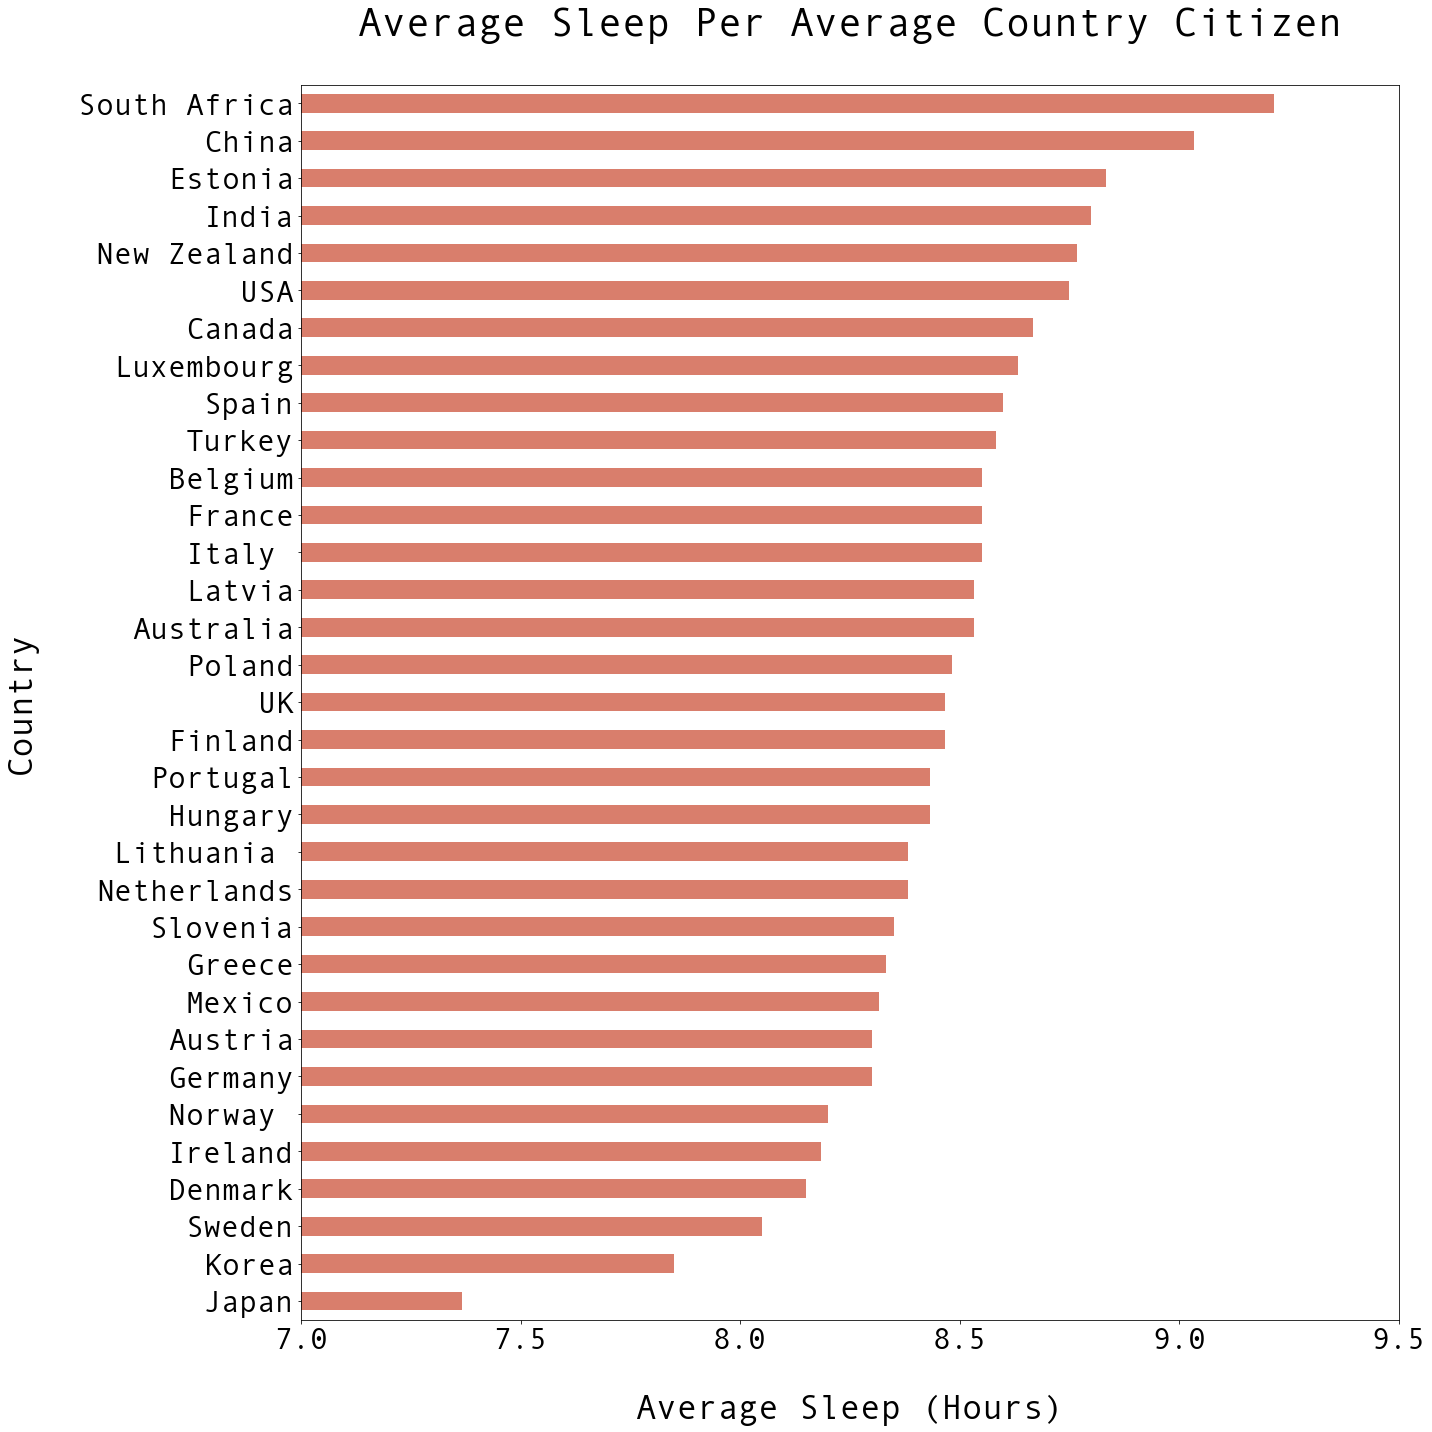

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))
oecd_total_sleep_hours = total_oecd_df['sleeping']/60
oecd_total_sleep_hours = oecd_total_sleep_hours.sort_values(ascending=True)
oecd_total_sleep_hours
oecd_total_sleep_hours.plot.barh(ax=ax,color = '#d97e6c')
ax.set_ylabel('Country\n',fontsize=34,fontfamily = 'Andale Mono')
ax.set_xlabel('\nAverage Sleep (Hours)',fontsize=34,fontfamily = 'Andale Mono')
ax.set_title('Average Sleep Per Average Country Citizen\n',fontsize=40,fontfamily = 'Andale Mono')
ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)

plt.xticks(fontname = 'Andale Mono') 
plt.yticks(fontname = 'Andale Mono') 

ax.set_xlim(7,9.5)

fig.tight_layout()
plt.savefig('../data_file/graphs/JPG/0001_sleep_in_countries.jpg',dpi =300)
plt.savefig('../data_file/graphs/PNG/0001_sleep_in_countries.png',dpi =300)

In [29]:
oecd_total_sleep_hours.describe()

count    33.000000
mean      8.456061
std       0.333823
min       7.366667
25%       8.316667
50%       8.466667
75%       8.600000
max       9.216667
Name: sleeping, dtype: float64

## Save Data

In [30]:
total_oecd_df.to_pickle('../data_file/cleaned_data_pickle/total_oecd_df.pickle')
men_oecd_df.to_pickle('../data_file/cleaned_data_pickle/men_oecd_df.pickle')
women_oecd_df.to_pickle('../data_file/cleaned_data_pickle/women_oecd_df.pickle')

In [31]:
total_oecd_df.to_csv(r'../data_file/cleaned_data_csv/total_oecd_df.csv')
men_oecd_df.to_csv(r'../data_file/cleaned_data_csv/men_oecd_df.csv')
women_oecd_df.to_csv(r'../data_file/cleaned_data_csv/women_oecd_df.csv')

In [32]:
total_oecd_archive_df.to_csv(r'../data_file/cleaned_data_csv/total_oecd_archive_df.csv')
men_oecd_archive_df.to_csv(r'../data_file/cleaned_data_csv/men_oecd_archive_df.csv')
women_oecd_archive_df.to_csv(r'../data_file/cleaned_data_csv/women_oecd_archive_df.csv')